# <div align="center">Song and Dance Man</div>
##### <div align="center"> author : Jatan Pandya </div> 

## <div align="center"> A corpus based analysis on the works of Bob Dylan from the year 1960 to 2020 </div>

## This project aims to analyze works of artist Bob Dylan by diving deep into his works that includes all songs (album releases, singles/EPs, unreleased/outtakes/demos), speeches etc.
_______________________________________________________________________________________________________________________________

### In order to achieve the same, following ideas are explored : 

### Surface Analysis :
________________________________
#### 1\. Text cleaning techniques (Lemmatization, normalization, stop word, punctuation removal etc.)
#### 2\. Visualizing Dylan's Corpus (Word Cloud)
#### 3\. Total number of words in corpus (tokens) and Dylan's vocabulary (types)
#### 4\. Dylan's Lexical diversity
#### 5\. The Largest word in Dylan's corpus
#### 6\. Average Word Length
#### 7\. Calculating and visualizing word occurances (Dispersion Plots)
#### 7\. Word Frequency
#### 8\. Hapax legomena (Hapaxes in Dylan's corpus)
#### 9\. Visualizing Zipfs distribution 
#### 10\. Keywords In Dylan's Corpus (TF-IDF)

### In depth Analysis :
________________________________
#### 1\. Common Collocations by Dylan (Bigrams/Trigrams/4,5-grams)
#### 2\.   Which year saw the "lengthiest" album by Dylan? (Total number of words by year)
#### 3\. Has Dylan stopped asking questions? ("?" occurrences through the years)
#### 4\. I, Me, Myself : Changing point of views through the years (Conditional FreqDist on First and second/third pronoun shift)
#### 5\. Recurring motifs and ideas in Dylan's Songs (Parts-of-speech Tagging and Synsets)
#### 6\. Paul Revere in Dylan's Corpus? Who else? Finding People/locations/events etc. mentioned in Dylan's songs (Entity recognition)
#### 7\. Are Dylan's songs losing complexity as the years go by? (Sentence segmentation, Automated Readability Index (ARI))
#### 8\. Which years were sad for Dylan and vice versa? (Sentiment Analysis)

#### <div align="right"> Bonus : 2:14 at https://bit.ly/2KPGSpQ</div>
_______________________________________________________________________________________________________________________________


### Let's start by scratching the surface of Bob Dylan's corpus, by first cleaning, applying various Natrual Language Processing text processing methods and then by extracting information about the same in a way that will help us understand the corpus in a much better way. Along the way, we'll acquaint ourselves with basics of NLP and concepts of English language and other ideas and techniques that come up in corpus based analysis.

_______________________________________________________________________________________________________________________________
### We will be using various meta files and the Corpus CSV file that we generated using [CorpusGenius](https://github.com/jatanjay/CorpusGenius) for Bob Dylan

#### Files such as :
- Dylan's corpus 
- Lyrics of songs released by year
- Dylan's Discography (by year)
- List of all songs relased by Dylan 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import nltk
from nltk import ngrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import cv2
from itertools import chain
import inflect

In [2]:
dylan_albums = "Dylan_albums.csv"
dylan_tracks = "Dylan_tracks.csv"
dylan_lyrics = "Dylan_lyrics.csv"
dylan_by_years = "Dylan_by_years.csv"
dylan_corpus = "Dylan_corpus.csv"

In [3]:
albums = pd.read_csv(dylan_albums)
tracks = pd.read_csv(dylan_tracks)
lyrics = pd.read_csv(dylan_lyrics)
by_years_raw = pd.read_csv(dylan_by_years, squeeze=True)

### Below are all the albums released by Bob Dylan

In [4]:
albums

,year,album title,album id
0,1962,Bob Dylan,26515
1,1963,The Freewheelin' Bob Dylan,17327
2,1964,The Times They Are A-Changin',28249
3,1964,Another Side of Bob Dylan,25519
4,1965,Bringing It All Back Home,17399
...,...,...,...
57,2017,Triplicate,328059
58,2018,"The Bootleg Series Vol. 14: More Blood, More T...",466127
59,2019,The Rolling Thunder Revue: The 1975 Live Recor...,648356
60,2019,"The Bootleg Series Vol. 15: Travelin' Thru, 19...",646838


### Below are all the tracks released by Bob Dylan

In [5]:
tracks

,album title,song title,song id,year
0,The Bootleg Series Vol. 8: Tell Tale Signs: Ra...,'Cross the Green Mountain,1006242,2008.0
1,NaN,'Cross the Green Mountain,1006242,NaN
2,Under the Red Sky,"10,000 Men",200681,1990.0
3,NaN,"10,000 Men",200681,NaN
4,NaN,2 X 2,200682,NaN
...,...,...,...,...
1917,NaN,"You're a Big Girl Now (9/16/74, Take 2)",3991896,NaN
1918,"The Bootleg Series Vol. 14: More Blood, More T...","You're a Big Girl Now (9/16/74, Take 2)",3991896,2018.0
1919,"The Bootleg Series Vol. 14: More Blood, More T...","You're a Big Girl Now (9/17/74 Take 1, Remake)",4124382,2018.0
1920,Fallen Angels,Young at Heart,2475866,2016.0


### Below are all the songs by lyrics released by Bob Dylan

In [6]:
lyrics

,Unnamed: 0,lyrics
0,'Cross the Green Mountain,"{'I cross the green mountain, I slept by the s..."
1,"10,000 Men",{'Ten thousand men on a hill Ten thousand men ...
2,2 X 2,"{'One by one, they followed the sun One by one..."
3,4th Time Around,"{'When she said ""Dont waste your words, theyre..."
4,A Hard Rain's A-Gonna Fall [Gaslight 1962],"{'Oh, where have you been, my blue-eyed son? A..."
...,...,...
500,You're A Big Girl Now [Hard Rain],{'Our conversation was short and sweet It near...
501,You're Gonna Make Me Lonesome When You Go,{'Ive seen love go by my door Its never been t...
502,You're Gonna Make Me Lonesome When You Go (9/1...,{'Ive seen love go by my door Its never been t...
503,You're a Big Girl Now,{'Our conversation was short and sweet It near...


### Tweaks for plots

In [7]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 200

### Text cleaning, DataFrame generation etc.

In [8]:
def cleaner(document):
    stop_words = set(stopwords.words('english'))
    punc = set(string.punctuation)
    punc.remove("'")
    punc.remove('-')
    exclude = set(punc)
    lemma = WordNetLemmatizer()
    stopwordremoval = " ".join(
        [i for i in document.lower().split() if i not in stop_words])
    punctuationremoval = ''.join(ch for ch in stopwordremoval
                                 if ch not in exclude)
    normalized = " ".join(
        lemma.lemmatize(word) for word in punctuationremoval.split())
    return normalized

by_years_raw.columns = ['year', 'lyrics']
by_years_raw = by_years_raw.sort_values(by=['year'])
as_dict = pd.Series(by_years_raw.lyrics.values,
                    index=by_years_raw.year).to_dict()
years = ["'" + str(year)[2:-2] for year in as_dict.keys()]
lyrics = [cleaner(all_songs) for all_songs in by_years_raw['lyrics']]
by_years = pd.DataFrame(zip(years[:-1], lyrics), columns=["year", "lyrics"])

In [9]:
read_corpus = pd.read_csv(dylan_corpus)
read_corpus.columns = ['Sr. No', "Dylan's Corpus"]
read_corpus

,Sr. No,Dylan's Corpus
0,0,"'Go ahead, drive the nails through my hand Lau..."


In [10]:
corpus = [corpus for corpus in read_corpus["Dylan's Corpus"]]
corpus[0][:1000]

"'Go ahead, drive the nails through my hand Laugh at me where you stand Go ahead, say it isnt me But the day will come That you will see  Cause Ill rise again Aint no power on Earth can tie me down Yes, Ill rise again Death cant keep me buried in the ground  Go ahead and mock my name You will see, Im still the same Go ahead, try to bury me Very, very soon I will be free  Cause Ill rise again Aint no power on Earth can tie me now And Ill rise again Death cant keep me buried in the ground  Go ahead, say Im dead and gone You will see that you were wrong Go ahead, try to hide the Son But the day will come When youll see Im the one  Cause Ill rise again Aint no power on Earth can tie me down Yes, Ill rise again Death cant keep me buried in the ground''Unlike most of the songs nowadays that have been written up in Tin Pan Alley, thats where most of the folk songs come from nowadays, this, this is a song, this wasnt written up there, this was written somewhere down in the United States  Well,

In [11]:
cleaned_corpus = cleaner(corpus[0])

In [12]:
corpus_tokenized = nltk.word_tokenize(cleaned_corpus)
corpus_tokenized[:5]

["'go", 'ahead', 'drive', 'nail', 'hand']

## Visualzing Dylan's Corpus with the help of a WordCloud

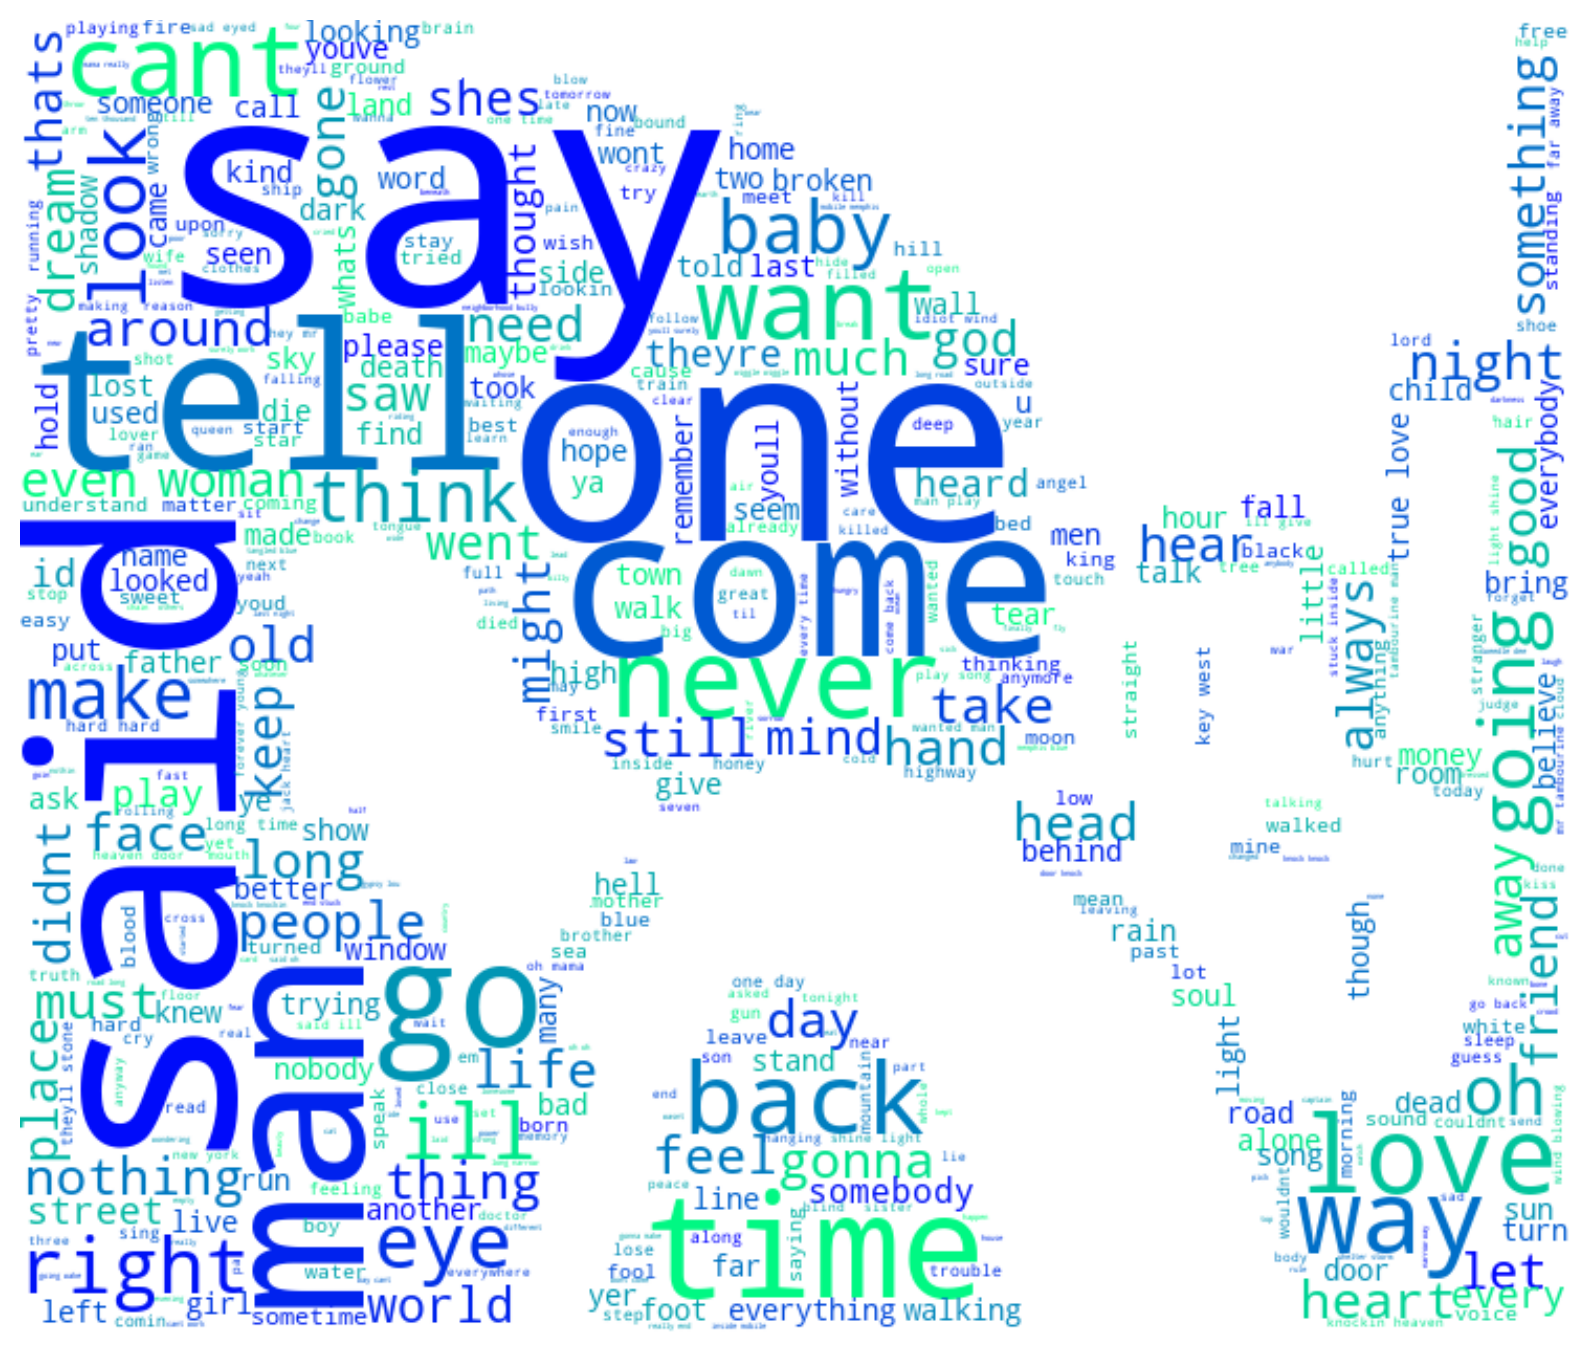

In [13]:
mask = cv2.imread("Dylan_mask.png", 1)
sw_word_cloud = STOPWORDS
sw_word_cloud.update([
    'well', 'dont', 'got', 'know', 'see', 'Im', 'aint', 'youre', 'theres',
    'Ive'
])

wc = WordCloud(max_words=500,
               relative_scaling=0.5,
               background_color='white',
               margin=0,
               mask=mask,
               stopwords=sw_word_cloud,
               random_state=10,
               contour_width=1,
               colormap='winter',
               contour_color='white').generate(cleaned_corpus)

colors = wc.to_array()
plt.figure()
plt.rcParams['figure.figsize'] = [30, 5]
plt.imshow(colors, interpolation="bilinear")
plt.axis('off')
plt.show()

orignal photo : https://bit.ly/3iMD9Ga

# Fast Facts

### Total number of words in corpus (tokens) and Dyaln's vocabulary (types)

In [14]:
tokens = len(corpus_tokenized)
types = len(set(corpus_tokenized))
print(
    f"For artist Bob Dylan\n1) Total number of tokens are {tokens}\n2) Total number of types are {types}"
)

For artist Bob Dylan
1) Total number of tokens are 91085
2) Total number of types are 7966


### Lexical Diversity

In [15]:
def lex_div(corpus):
    lex_div = types / len(corpus)
    print(f"Bob Dylan's Lexical Deversity is: {lex_div} or {lex_div*100} %")


lex_div(corpus_tokenized)

Bob Dylan's Lexical Deversity is: 0.08745677114782895 or 8.745677114782895 %


### Largest word in Dylan's corpus

In [16]:
words_sorted = sorted(set(corpus_tokenized), key=len, reverse=True)
largest_word = words_sorted[0]
print(
    f"Largest word in Bob Dylan's Corpus is : '{largest_word}' with length {len(largest_word)}.\n"
)
print(f"Few other words are :\n{words_sorted[1:5]}")

Largest word in Bob Dylan's Corpus is : 'great-granddaughter' with length 19.

Few other words are :
['commander-in-chief', 'million-dollar-man', 'pseudo-scientific', 'taken-for-granted']


### Average Word Length

In [17]:
length = list(map(len, corpus_tokenized))
sum(length) / len(length)

4.896624032497118

###  Word occurances :
#### 1. Calculation (% of corpus)
#### 2. Visualizing (Dispersion plots)

0.01427238293901301 % of the corpus is taken by word 'clown'
0.026349014656639403 % of the corpus is taken by word 'sara'
0.008783004885546468 % of the corpus is taken by word 'she'
0.2953285392765 % of the corpus is taken by word 'he'
0.4742822638195093 % of the corpus is taken by word 'love'
0.03622989515287918 % of the corpus is taken by word 'hate'



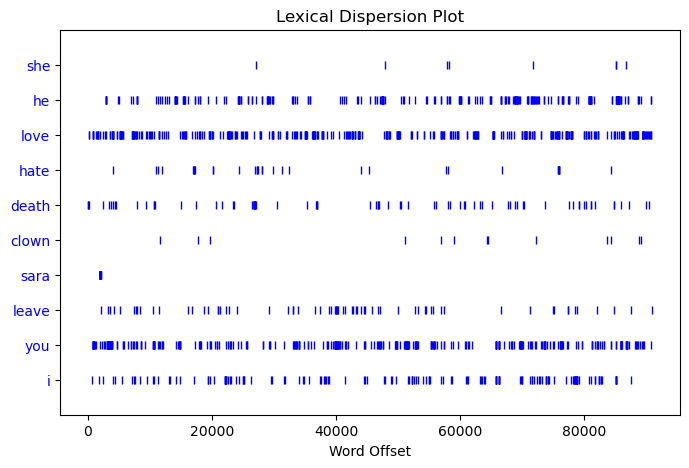

In [18]:
corpus_text = nltk.Text(corpus_tokenized)


def occurs(words):
    for word in words:
        count = corpus_text.count(word)
        as_per = 100 * count / len(corpus_text)
        print(f"{as_per} % of the corpus is taken by word '{word}'")


occurs(["clown", "sara", "she", "he", "love", "hate"])
print()
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['figure.figsize'] = [8, 5]
corpus_text.dispersion_plot([
    'she', 'he', 'love', 'hate', 'death', 'clown', 'sara', 'leave', 'you', "i"
])

#### In additon to occurances, Dispersion plot also gives us an idea of "when" and what other words it occurs along with in the corpus.
#### Application : For the song 'Sara' - Desire (1976)
#### We can make following educated guesses :
1. Towards the end of song, It's possible that the word 'leave' will be mentioned
2. It's possbile the word 'love' is used the song
3. There is only one song where Dylan uses the word "Sara" 
4. These guesses are actually true! (Lyrics : https://www.bobdylan.com/songs/sara/)

### Word Frequency 

In [19]:
freq_dist = nltk.FreqDist(word.lower() for word in corpus_tokenized)
freq_dist.most_common(10)

[('im', 1048),
 ('like', 844),
 ('well', 821),
 ('dont', 774),
 ('know', 756),
 ('got', 736),
 ('one', 672),
 ('say', 594),
 ('time', 555),
 ('see', 539)]

###  Hapax legomena 

In [20]:
hapaxes = freq_dist.hapaxes()
print(
    f"Total number of Hapaxes : {len(hapaxes)} or {100 * len(hapaxes)/types} % of the total corpus"
)
hapaxes[:20]

Total number of Hapaxes : 2667 or 33.479789103690685 % of the total corpus


["'go",
 'very',
 'ranger',
 'tonto',
 'fixing',
 'a-blowing',
 'six-shooter',
 'taketh',
 'teacheth',
 'builder',
 'shapeth',
 'turneth',
 'dwells',
 'solemnly',
 'bombed',
 'bled',
 'lynching',
 'gladiator',
 'cheered',
 'tread']

#### It's worth noting that the word "very" is a Hapax in Dylan's Corpus!

### Quantify Dylan's AppE english influence
##### "A-" before a verb was a prefix common in 16th C. Today it's quite common in Appalachian English, in the US. For example in "The times they are a-changin' '"

In [21]:
aape = sorted({word for word in corpus_tokenized if word.startswith("a-")})
print(f"Total : {len(aape)} \nFew examples : {aape[1:7]}")

Total : 130 
Few examples : ['a-barkin', 'a-barking', 'a-beatin', 'a-bendin', 'a-blazing', 'a-bleedin']


### Visualizing Zipfs distribuition

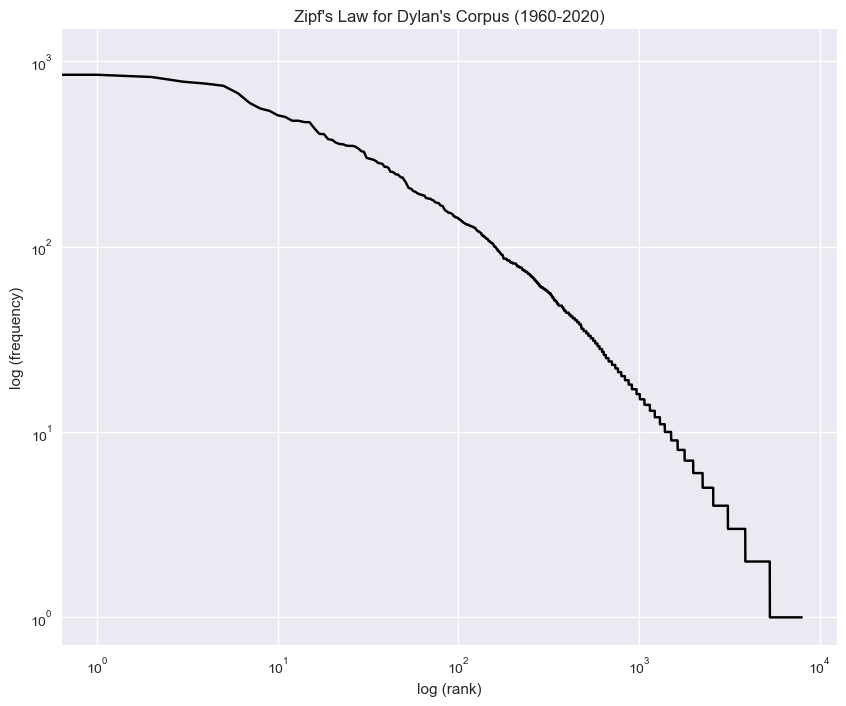

In [22]:
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = [10, 8]
words = [w for w in corpus_tokenized]
fdist = nltk.FreqDist(words)
e = [no for no in fdist.values()]
counts = sorted(e, reverse=True)
plt.figure()
plt.yscale('log')
plt.xscale('log')
plt.title("Zipf's Law for Dylan's Corpus (1960-2020)")
plt.xlabel("log (rank)")
plt.ylabel("log (frequency)")
plt.plot(counts,color='k')

#### According to the figure above, we can confirm Zipf's law. 
Smooth, flat plot at the start are words with more or less frequency. The steps are the end denote words with low frequency. 

### Finding key words In Dylan's Corpus with the help of TF-IDF

In [23]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([cleaned_corpus])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=[feature_names])
df = df.transpose()
df.columns = ['TF-IDF Score']
df = df.sort_values(by=['TF-IDF Score'], ascending=False)
df[:5]

,TF-IDF Score
im,0.278834
like,0.225029
well,0.219198
dont,0.205150
know,0.200644


# In depth Analysis

### Common Collocations by Dylan (Bigrams/Trigrams/4,5-grams)

In [24]:
corpus_text.collocations()
bigrams = nltk.FreqDist(ngrams(corpus_tokenized, 2)).most_common(5)
trigrams = nltk.FreqDist(ngrams(corpus_tokenized, 3)).most_common(5)
grams_4 = nltk.FreqDist(ngrams(corpus_tokenized, 4)).most_common(5)
grams_5 = nltk.FreqDist(ngrams(corpus_tokenized, 5)).most_common(5)

key west; true love; dont know; theyll stone; neighborhood bully;
knockin heaven; mobile memphis; shelter storm; new york; forever
young; julius ethel; shine light; knock knockin; inside mobile;
desolation row; idiot wind; heaven door; far away; hard hard; tangled
blue


In [25]:
bigrams

[(('gon', 'na'), 293),
 (('dont', 'know'), 118),
 (('im', 'going'), 95),
 (('true', 'love'), 68),
 (('dont', 'want'), 65)]

In [26]:
trigrams

[(('youre', 'gon', 'na'), 57),
 (('im', 'gon', 'na'), 46),
 (('aint', 'gon', 'na'), 38),
 (('knockin', 'heaven', 'door'), 33),
 (('idiot', 'wind', 'blowing'), 32)]

In [27]:
grams_4

[(('come', 'in', 'said', 'ill'), 30),
 (('in', 'said', 'ill', 'give'), 30),
 (('mr', 'tambourine', 'man', 'play'), 30),
 (('tambourine', 'man', 'play', 'song'), 30),
 (('hey', 'mr', 'tambourine', 'man'), 29)]

In [28]:
grams_5

[(('come', 'in', 'said', 'ill', 'give'), 30),
 (('mr', 'tambourine', 'man', 'play', 'song'), 30),
 (('hey', 'mr', 'tambourine', 'man', 'play'), 29),
 (('door', 'knock', 'knock', 'knockin', 'heaven'), 27),
 (('knock', 'knock', 'knockin', 'heaven', 'door'), 27)]

#### Of all the n-grams, bigrams seems the most useful. It shows us the common word choice and structure Dylan uses. For other n-grams, there are mere repetitions, perhaps due to the way Dylan writes his hooks?

### Which year saw the "lengthiest" album by Dylan? I.e Total number of words by year

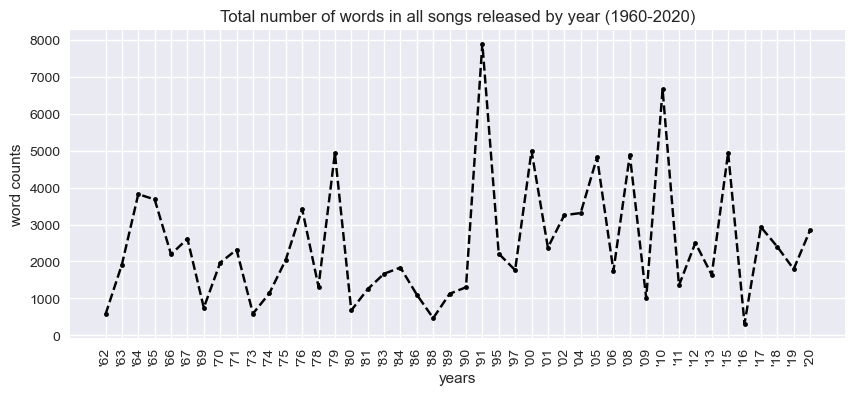

In [29]:
def lby_year(by_year):
    tok = [nltk.word_tokenize(song) for song in by_years['lyrics']]
    wrd_l = [len(toke) for toke in tok]
    years = [year for year in by_year['year']]
    clubbed = pd.Series(wrd_l, years)
    return clubbed


word_length = lby_year(by_years)


def plt_wrd(word_length):
    plt.title(
        "Total number of words in all songs released by year (1960-2020)")
    plt.plot(word_length, "--.", color='k')


plt.rcParams['figure.figsize'] = [10, 4]
plt.xticks(rotation='vertical')
plt.xlabel("years")
plt.ylabel("word counts")
plt.grid('on')
plt_wrd(word_length)

### Well, what the hell happend in '91?
#### '91 is actually the year Dylan released his first album in bootleg series named "The Bootleg Series Volumes 1-3 (Rare & Unreleased) 1961-1991" With over 50 songs, naturally it contains max number of words. Further proving our graph is accurate. 
##### Reason why Bootlegs are included :  Because more often or not, it’s a common fact that: / Bootlegs/demos etc. are often unfinished versions of final songs. Lyrically they are a rich source of alternate lyrics. Hence aren't excluded as it’ll affect the final corpus. 


### Has Dylan stopped asking questions? I.e Exploring "?" occurances through the years

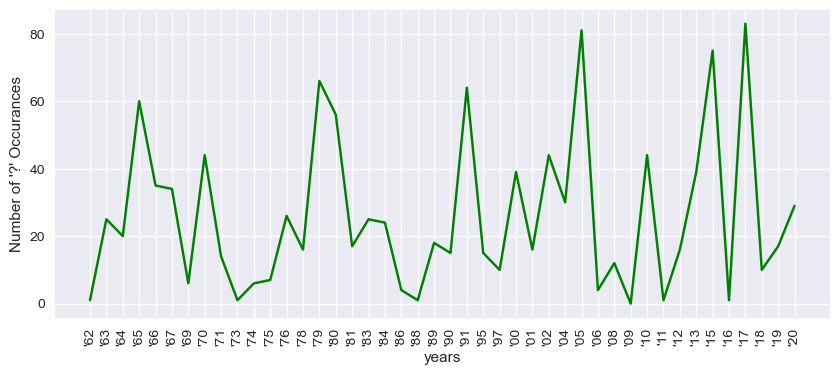

In [30]:
quest_dict = {}


def question(df):
    year = 0
    for song in df.lyrics.values:
        year += 1
        qm = song.count("?")
        quest_dict[year] = qm
    return quest_dict


question = question(by_years_raw)
question_by_years = dict(zip(years[:-1], list(question.values())))
plt.rcParams['figure.figsize'] = [10, 4]
plt.xticks(rotation='vertical')
plt.xlabel("years")
plt.ylabel("Number of '?' Occurances")
plt.plot(list(question_by_years.keys()), list(question_by_years.values()),color='g')

#### From the graph we observe :
1. Early in the days, during his protest singer days, he had more question begging songs. This is indeed true as this was the period where songs containing lines such as "How many roads must a man walk down, Before you call him a man?" and "Oh, where have you been, my blue-eyed son?" were penned
2. After that it was on a decline. It's true as this was the period where the 'surreal' and declarative style Dylan albums were taking form such as Bringing it all back home, Blonde on Blonde etc. This continued till his country music phase - John Wesley Harding, Nashville Skyline
3. Recently, last decade has seen rise in question mark usage. Shadows in the night (2015) shows the maximum occurance of "?"


### I,Me,Myself : Point of view through the years

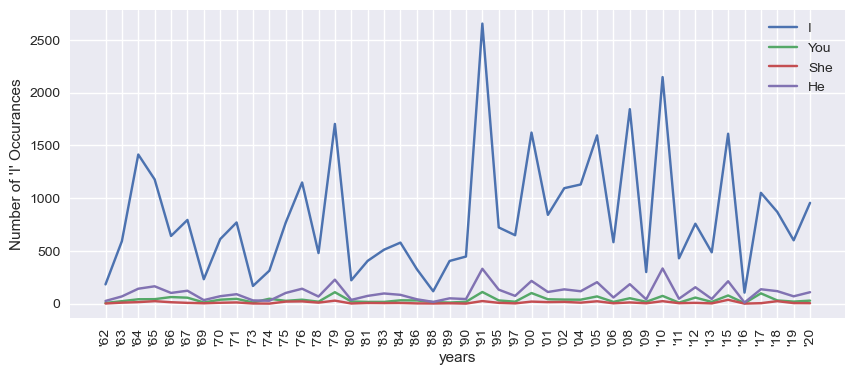

In [31]:
pro_dict = {}


def pro(df):
    year = 0
    for song in df.lyrics.values:
        year += 1
        i = song.count("i")
        y = song.count("you")
        s = song.count("she")
        h = song.count("he")
        pro_dict[year] = [i, y, s, h]
    return pro_dict


pronoun = pro(by_years)
pro_by_years = dict(zip(years, list(pronoun.values())))
plt.rcParams['figure.figsize'] = [10, 4]
plt.xticks(rotation='vertical')
plt.xlabel("years")
plt.ylabel("Number of 'I' Occurances")
plt.plot(list(pro_by_years.keys()), list(pro_by_years.values()))
plt.legend(["I", "You", "She", "He"])

#### Nothing to see here, seems like Dylan really loves to talk in first person. 

### Recurring motifs and ideas in Dylan's Songs 

In [32]:
sing_n = {
    sets[0]
    for sets in nltk.pos_tag(corpus_tokenized) if sets[1] == 'NN'
}
plu_n = {
    sets[0]
    for sets in nltk.pos_tag(corpus_tokenized) if sets[1] == 'NNS'
}
sing_prop_n = {
    sets[0]
    for sets in nltk.pos_tag(corpus_tokenized) if sets[1] == 'NNP'
}
plu_prop_n = {
    sets[0]
    for sets in nltk.pos_tag(corpus_tokenized) if sets[1] == 'NNPS'
}
nouns = set(chain(sing_n, plu_n, sing_prop_n, plu_prop_n))

p = inflect.engine()
plural_nouns = set()
for word in nouns:
    sing = p.singular_noun(word)
    if sing:
        plural_nouns.add(sing)
    else:
        plural_nouns.add(word)

all_l = {}
res = defaultdict(set)
for noun in plural_nouns:
    t = wn.synsets(noun)
    if t is not None:
        lemma = set()
        for synset in t:
            l = {l for l in synset.lemma_names()}
            lemma.update(l)
        all_l[noun] = lemma
for key, val in all_l.items():
    count = 0
    for ent in val:
        if ent in plural_nouns:
            count += 1
    res[count].add(key)
max_motifs = sorted(res.keys(), reverse=True)[:19]

print(f"Recurring Motifs/Actions/Ideas : \n")
for n in max_motifs:
    print(f"Action/Motif/Ideas with {n} synsets :")
    print(f"{res[n]}\n")

Recurring Motifs/Actions/Ideas : 

Action/Motif/Ideas with 34 synsets :
{'take'}

Action/Motif/Ideas with 29 synsets :
{'got', 'saw', 'get'}

Action/Motif/Ideas with 28 synsets :
{'see'}

Action/Motif/Ideas with 27 synsets :
{'go'}

Action/Motif/Ideas with 25 synsets :
{'hold', 'make'}

Action/Motif/Ideas with 24 synsets :
{'making'}

Action/Motif/Ideas with 22 synsets :
{'passing', 'held', 'place', 'cast', 'check', 'run', 'charge'}

Action/Motif/Ideas with 21 synsets :
{'draw'}

Action/Motif/Ideas with 20 synsets :
{'ran', 'drawn', 'set', 'bearing'}

Action/Motif/Ideas with 19 synsets :
{'range', 'shot', 'break', 'setting'}

Action/Motif/Ideas with 18 synsets :
{'deal', 'point', 'mark'}

Action/Motif/Ideas with 17 synsets :
{'play', 'call', 'fall', 'catch', 'lot'}

Action/Motif/Ideas with 16 synsets :
{'roll', 'stop', 'beat', 'give', 'broken', 'turn', 'broke', 'fix', 'twist', 'look', 'breaking'}

Action/Motif/Ideas with 15 synsets :
{'born', 'drift'}

Action/Motif/Ideas with 14 synset


#### Logic : All nouns from the corpus (extracted using POS tagging) are searched and paired along with their synset. Then each word in synset is searched in Dylan's corpus. The word is then sorted accordingly on the basis of it's occurance.

#### For Example, for the motif "take" with 34 occurances : This means "to take/he took/ she takes" etc or simply the idea of "take" is the most common recurring motif in Dylan's Corpus

#### We can go deeper by using hyponyms. Suppose for motif "artist" we can use nltk's hyponyms to find what "kind" of artist does he mention the most!

### Paul Revere in Dylan's Corpus? Who else? Finding People/locations/events etc. mentioned in Dylan's songs (Entity recognition)

In [33]:
def entityreco(text):
    person = []
    norp = []
    fac = []
    gpe = []
    loc = []
    event = []
    works = []

    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    for entity in doc.ents:
        if entity.label_ == "PERSON":
            person.append(entity)
        if entity.label_ == "NORP":
            norp.append(entity)
        if entity.label_ == "FAC":
            fac.append(entity)
        if entity.label_ == "GPE":
            gpe.append(entity)
        if entity.label_ == "LOC":
            loc.append(entity)
        if entity.label_ == "EVENT":
            event.append(entity)
        if entity.label_ == "WORK_OF_ART":
            works.append(entity)

    return person, norp, fac, gpe, loc, event, works


entity = entityreco(cleaned_corpus)

print(f"People mentioned by Dylan in his songs : {entity[0]}\n")
print(
    f"Nationalities/religious/political mentioned by Dylan in his songs : {entity[1]}\n"
)
print(
    f"Buildings/airports/highways/bridges etc. mentioned by Dylan in his songs : {entity[2]}\n"
)
print(
    f"Countries, cities, states etc. mentioned by Dylan in his songs : {entity[3]}\n"
)
print(
    f"Non-GPE locations, mountain ranges etc. mentioned by Dylan in his songs : {entity[4]}\n"
)
print(
    f"Named hurricanes, battles, wars, sports events etc. mentioned by Dylan in his songs : {entity[5]}\n"
)
print(
    f"Titles of books, songs, etc. mentioned by Dylan in his songs : {entity[6]}\n"
)

People mentioned by Dylan in his songs : [song, lone ranger tonto, rainbow sky, turneth, roman, grin eye, michelangelo, you''oh, jewel nose, brave jefferson, bluff, jewel nose, brave jefferson, bluff, sittin, williams, somehow''i, sara easy, sweet virgin angel sweet, jewel, kelp piece old, roam, guitar cat mew, roman king sharkskin, bowtie button, roman, roman king, roman king ill, hag, roman king ill, ding dong, wig babylon, moon, wig babylon, evry, turnin, swayed guitar, willie mctell, willie mctell, sweet magnolia, willie mctell, willie mctell, st james hotel, willie mctell', willie mctell, willie mctell, sweet magnolia, willie mctell, willie mctell, st james hotel, mary anne, sister lucy, austin fort, peter otoole stole rolls-royce, misunderstood anybody, nathans rus, del rio, van gogh, peetie wheatstraw, charlie parker, clifford brown, guitar slim, cat mouse, yearning''i, ruin pettiness beneath bare, ruin pettiness beneath bare, cinderella, bette davis, moon, einstein, robin hood 

#### As you can see, the recognizer is not entirerly accurate This is can be due to number of reasons right from maybe due to the text cleaning processes we applied, and that reduced the spaCy's proper noun recognizer etc. (But it you see it gets the job done. Data can be easily cleaned by a Human in no time)
#### Lastly, we can further increase the accuracy by employing ML by training spaCy's statistical model. As for now, I'll keep this part for another project, perhaps where I can draw more insightful inferences. 

### Are Dylan's songs losing complexity as the years go by? (Sentence segmentaion, Automated Readability Index (ARI))

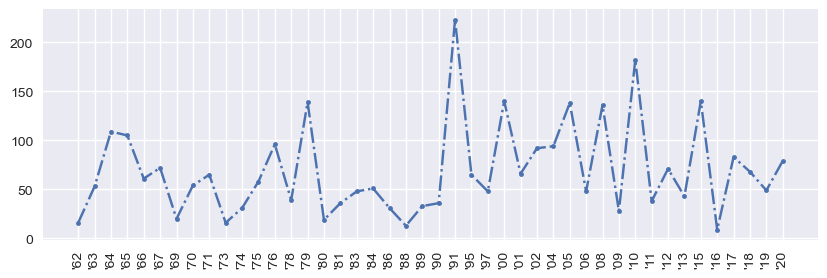

In [34]:
ari_dict = {}


def ari(df):
    year = 0
    for song in df.lyrics.values:
        year += 1
        punkted = nltk.sent_tokenize(song)
        uw = list(map(len, punkted))
        avg_uw = sum(uw) / len(uw)
        us = [len(sent.split()) for sent in punkted]
        avg_us = sum(us) / len(us)
        ari = 4.71 * avg_uw + 0.5 * avg_us - 21.43
        ari_dict[year] = round(ari / 1000)
    return ari_dict


ari = ari(by_years)
ari_by_years = dict(zip(years[:-1], list(ari.values())))

plt.rcParams['figure.figsize'] = [10, 3]
plt.xticks(rotation='vertical')
plt.plot(list(ari_by_years.keys()), list(ari_by_years.values()), ".-.")

#### In order to quantify Dylan's complexity through the years, It made sense to make use of AR Index. ARI are used to score reading difficulty of texts. The Automated Readability Index (ARI) of the text is defined to be: 4.71 (avg_letters by words) + 0.5 (avg_words_by words) - 21.43
#### This can be made more accurate by perhaps a more robust sentence segmentation method

### Which years were sad for Dylan and vice versa? (Sentiment Analysis)

In [35]:
sid = SentimentIntensityAnalyzer()
negative = []
neutral = []
positive = []
compound = []
for_sa = by_years[["year", "lyrics"]]
sentiment_by_years = for_sa.copy()

for i in sentiment_by_years['lyrics']:
    scores = sid.polarity_scores(i)
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])

sentiment_by_years['negative'] = negative
sentiment_by_years['neutral'] = neutral
sentiment_by_years['positive'] = positive
sentiment_by_years['compound'] = compound
sentiment_by_years['Negative inclined'] = np.where(
    sentiment_by_years['negative'] > sentiment_by_years['positive'], 'True',
    'False')
negatives = sentiment_by_years.loc[sentiment_by_years['Negative inclined'] ==
                                   'True']
negative_years = [y for y in negatives['year']]
sentiment_by_years.head()

,year,lyrics,negative,neutral,positive,compound,Negative inclined
0,'62,'im thousand mile home walking road men gone i...,0.102,0.706,0.193,0.9942,False
1,'63,'how many road must man walk call man many sea...,0.164,0.643,0.193,0.9961,False
2,'64,'hollis brown lived outside town hollis brown ...,0.180,0.654,0.166,-0.9981,True
3,'65,'once upon time dressed fine threw bum dime pr...,0.143,0.686,0.171,0.9987,False
4,'66,'early mornin early mornin im callin im callin...,0.142,0.603,0.255,0.9998,False


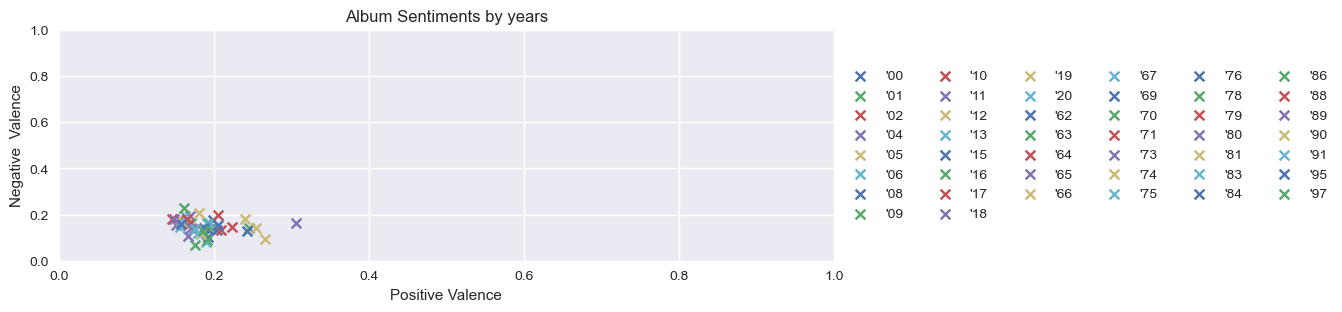

In [36]:
def sctplt():
    for name, group in sentiment_by_years.groupby('year'):
        plt.scatter(group['positive'],
                    group['negative'],
                    label=name,
                    marker='x')


sctplt()
plt.xlim([0.00, 1])
plt.ylim([0.00, 1])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=6)
plt.title("Album Sentiments by years")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()

#### From the scatter plot:
1. Most of the albums by years are near about in the neutral or middle range, $ positve \space       sentiment \approx negaitve \space sentiment $ i.e $ x \space coordinate \approx y \space coordinate $
2. As far as outliers are concerned, they do exist more on positive valence
3. There are few years where songs were more negative, they will be explored in the next plot

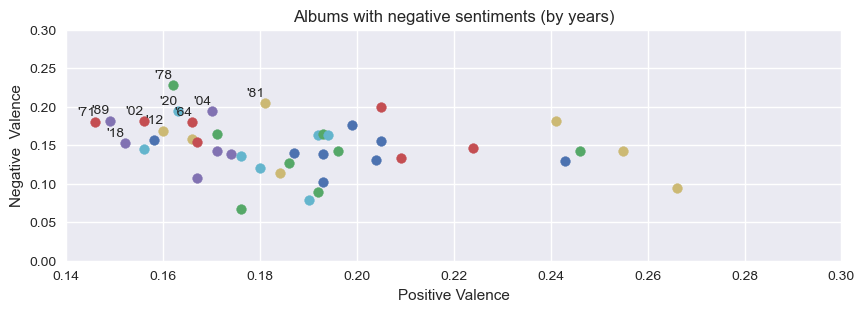

In [37]:
def sctplt():
    for name, group in sentiment_by_years.groupby('year'):
        plt.scatter(group['positive'],
                    group['negative'],
                    label=name,
                    marker='o')
        for y in negative_years:
            if y == name:
                label = f"{name}"
                plt.annotate(
                    label,  # this is the text
                    (group['positive'],
                     group['negative']),  # this is the point to label
                    textcoords="offset points",  # how to position the text
                    xytext=(0, 5),  # distance from text to points (x,y)
                    ha='right'
                )  # horizontal alignment can be left, right or center


sctplt()
plt.xlim([0.14, 0.30])
plt.ylim([0.00, 0.30])
plt.title("Albums with negative sentiments (by years)")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()

#### From the scatter plot:
1. Years such as '71, '89, '18, '78, '81 etc. are the years with songs with high negative sentiment i.e where $ y \space coordinate > x \space coordinate $

_______________

#### In closing, I'd like to end this project by quoting a line from one of my favourite Dylan songs
>*If I'd thought about it I never would've done it, I guess I would've let it slide, If I'd lived my life by what others were thinkin', the heart inside me would've died. I was just too stubborn to ever be governed by enforced insanity,Someone had to reach for the risin' star,I guess it was up to me*